In [11]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
data = pd.read_csv('data.csv')


In [12]:
from scipy.stats import zscore

z_scores = np.abs(zscore(data))
outliers = (z_scores > 3).sum(axis=0)

print("Outliers per feature:\n", outliers)

Outliers per feature:
 age                     0
sex                     0
chest pain type         0
resting bp s           10
cholesterol             5
fasting blood sugar     0
resting ecg             0
max heart rate          2
exercise angina         0
oldpeak                11
ST slope                0
target                  0
dtype: int64


In [13]:
X = data.drop('target', axis=1)
y = data['target']
scaler = StandardScaler()  # or MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [14]:


# Check the unique values in the target
print(y.unique())


[0 1]


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.4f}\n")


Model: Logistic Regression
Accuracy: 0.8613
Precision: 0.8601
Recall: 0.8595
F1 Score: 0.8598

Model: Decision Tree
Accuracy: 0.8992
Precision: 0.8976
Recall: 0.9007
F1 Score: 0.8986

Model: Random Forest
Accuracy: 0.9496
Precision: 0.9499
Recall: 0.9482
F1 Score: 0.9490

Model: Support Vector Machine
Accuracy: 0.8908
Precision: 0.8967
Recall: 0.8845
F1 Score: 0.8882



In [20]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for each model
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"Model: {name}, Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Model: Logistic Regression, Cross-Validation Accuracy: 0.8151 ± 0.0347
Model: Decision Tree, Cross-Validation Accuracy: 0.8849 ± 0.0635
Model: Random Forest, Cross-Validation Accuracy: 0.9252 ± 0.0343
Model: Support Vector Machine, Cross-Validation Accuracy: 0.8563 ± 0.0284


##### We will be using Random Forest as it gave the maximum accuracy.

In [21]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Random Forest 
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9075447781758059


[[100   7]
 [  4 127]]
0.9537815126050421
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       107
           1       0.95      0.97      0.96       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



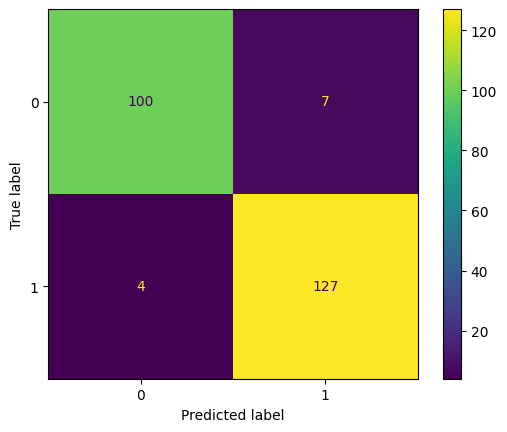

In [23]:


# Train the best model (using RandomForest as an example)
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix


best_model = grid_search.best_estimator_

# Fit the model
best_model.fit(X_train, y_train)
y_pred=best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=best_model.classes_)
disp.plot()


In [24]:
import joblib


joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']